In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import validation_curve
import numpy as np





In [2]:
def mean_score(scoring):
    return {i:j.mean() for i,j in scoring.items()}

# Loading data.
- Load data and shuffle it with specific seeding.

In [3]:
df = pd.read_csv("fixed_values_ds.csv")
df.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29']
df = sklearn.utils.shuffle(df)
X = df.drop("29",axis=1).values
X = preprocessing.scale(X)
y = df['29'].values
df.head()


,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
3558,-1,1,-1,-1,-1,-1,0,1,1,1,...,1,1,1,-1,1,1,1,1,1,1
1783,-1,1,-1,-1,-1,1,0,-1,1,-1,...,-1,-1,-1,-1,1,1,1,-1,1,1
14018,-1,-1,1,-1,-1,-1,0,-1,1,1,...,-1,-1,-1,-1,1,-1,1,-1,1,-1
3464,-1,-1,-1,-1,-1,-1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9950,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,1,1,-1,-1,-1,1,-1


# Evalution metrics 
 - Specifying evaluation metrics for classification models

In [4]:
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'f1': 'f1'}
fold_count=10

# Classication models for phishing detection:


### Random Forest

In [5]:
rforest_clf=RandomForestClassifier()
cross_val_scores = cross_validate(rforest_clf, X, y, cv=fold_count, scoring=scoring)
rforest_clf_score = mean_score(cross_val_scores)
print(rforest_clf_score)





{'fit_time': 0.5088544607162475, 'score_time': 0.02754373550415039, 'test_accuracy': 0.9254902878657466, 'test_recall': 0.9279204948420375, 'test_precision': 0.9235822006191159, 'test_f1': 0.9256727941376587}


### ROC Curve


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.977


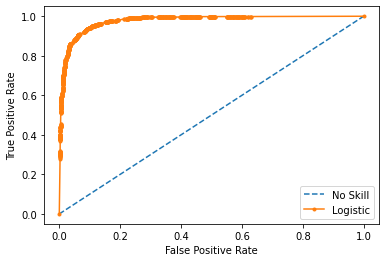

In [6]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
ns_probs = [0 for _ in range(len(testy))]
model = RandomForestClassifier(min_samples_split=7, verbose=True)
model.fit(trainX, trainy)
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

### Validation Curve


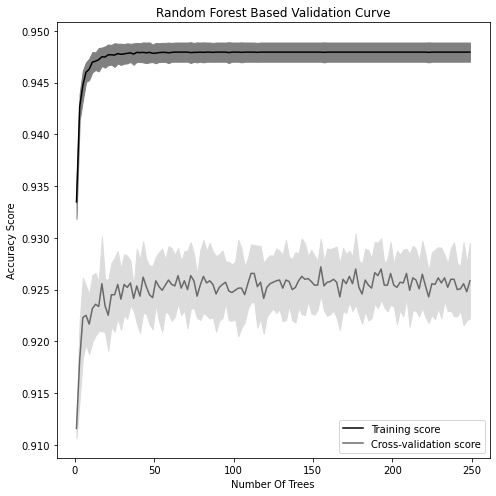

In [7]:
param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                              X, y, param_name="n_estimators", param_range=param_range,
                              cv=4, scoring="accuracy", n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

pyplot.subplots(1, figsize=(7, 7))
pyplot.plot(param_range, train_mean, label="Training score", color="black")
pyplot.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

pyplot.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
pyplot.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

pyplot.title("Random Forest Based Validation Curve")
pyplot.xlabel("Number Of Trees")
pyplot.ylabel("Accuracy Score")
pyplot.tight_layout()
pyplot.legend(loc="best")
pyplot.show()